In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.discrete import discrete_model

In [3]:
## import taxes csv data as a dataframe with all strings
taxes = pd.read_csv('Data/njlocaltaxes.csv', dtype='object')

In [4]:
taxes = taxes.dropna()

In [5]:
muni = pd.read_pickle('muni.pkl')

In [6]:
muni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 2 columns):
FIPS       565 non-null object
Unicode    565 non-null object
dtypes: object(2)
memory usage: 8.9+ KB


In [7]:
taxes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Data columns (total 38 columns):
Unicode                                                        565 non-null object
Municipality                                                   565 non-null object
County                                                         565 non-null object
NetValuationTaxable                                            565 non-null object
NetCountyTaxesApportionedLessStateAid                          565 non-null object
CountyLibraryTaxes                                             565 non-null object
LocalHealthServicesTaxes                                       565 non-null object
CountyOpenSpacePreservationTrustFund                           565 non-null object
TotalCountyLevy                                                565 non-null object
AsRequiredbyDistrictSchoolBudget                               565 non-null object
RegionalConsolidatedandJointSchoolBudget                       56

In [8]:
t = muni.merge(taxes,on='Unicode')

In [9]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Data columns (total 39 columns):
FIPS                                                           565 non-null object
Unicode                                                        565 non-null object
Municipality                                                   565 non-null object
County                                                         565 non-null object
NetValuationTaxable                                            565 non-null object
NetCountyTaxesApportionedLessStateAid                          565 non-null object
CountyLibraryTaxes                                             565 non-null object
LocalHealthServicesTaxes                                       565 non-null object
CountyOpenSpacePreservationTrustFund                           565 non-null object
TotalCountyLevy                                                565 non-null object
AsRequiredbyDistrictSchoolBudget                               56

In [10]:
t2 = t.iloc[:,:4].join(t.iloc[:,4:].apply(pd.to_numeric)).fillna(0)

In [11]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 564
Data columns (total 39 columns):
FIPS                                                           565 non-null object
Unicode                                                        565 non-null object
Municipality                                                   565 non-null object
County                                                         565 non-null object
NetValuationTaxable                                            565 non-null int64
NetCountyTaxesApportionedLessStateAid                          565 non-null int64
CountyLibraryTaxes                                             565 non-null int64
LocalHealthServicesTaxes                                       565 non-null int64
CountyOpenSpacePreservationTrustFund                           565 non-null int64
TotalCountyLevy                                                565 non-null int64
AsRequiredbyDistrictSchoolBudget                               565 non-

In [12]:
## For pickling and using in analysis, include only the population-scaled values
t3 = t2.iloc[:,:1].join(t2.iloc[:,19:])
t3

,FIPS,CountyLevy%ofTotalLevy,SchoolLevy%ofTotalLevy,MunicipalLevy%ofTotalLevy,CYMunicipalRate,CYMunicipalLibraryRate,CYMunicipalOpenSpaceRate,CYTotalMunicipalRate,CYSchoolRate,CYCountyRate,...,AverageResidentialPropertyValue,AverageTotalPropertyTaxes(notincludingcreditsanddeductions),StateEqualizationTableAverageRatio,StateEqualizationTableAverageRatio(DecimalForm),CYEqualizedPropertyValue(Pre-Appeal),CYCountyEQTaxRate,CYSchoolEQTaxRate,CYLocalPurposeMunicipalEQTaxRate,CYTotalMunicipalEQRate,CYTotalEQRate(REAPNotIncluded)
0,3401577180,0.205,0.585,0.210,0.657,0.035,0.011,0.703,1.958,0.687,...,210399,5599,94.79,0.9479,4485376829,0.651,1.856,0.623,0.667,3.174
1,3400563510,0.120,0.572,0.308,1.022,0.000,0.000,1.022,1.898,0.397,...,152502,4454,104.55,1.0455,419981114,0.415,1.985,1.069,1.069,3.469
2,3402943140,0.629,0.009,0.362,0.247,0.000,0.000,0.247,0.006,0.429,...,2314052,5854,96.71,0.9671,1287497263,0.415,0.006,0.239,0.239,0.660
3,3402973125,0.185,0.639,0.175,0.398,0.000,0.000,0.398,1.453,0.421,...,255149,4722,98.81,0.9881,241946058,0.416,1.435,0.393,0.393,2.244
4,3402907420,0.221,0.491,0.288,0.597,0.000,0.015,0.612,1.044,0.470,...,264282,4378,86.78,0.8678,14460430346,0.408,0.906,0.519,0.532,1.846
5,3402522950,0.104,0.524,0.372,0.913,0.031,0.000,0.944,1.327,0.262,...,250499,5689,104.56,1.0456,986304992,0.274,1.385,0.953,0.985,2.644
6,3402549920,0.159,0.590,0.251,0.482,0.000,0.022,0.504,1.183,0.319,...,322054,5434,93.51,0.9351,3131413402,0.298,1.105,0.450,0.471,1.874
7,3402574900,0.132,0.750,0.118,0.216,0.000,0.060,0.276,1.760,0.311,...,465708,9481,96.96,0.9696,1263545689,0.300,1.699,0.208,0.266,2.265
8,3402564410,0.131,0.586,0.282,0.541,0.033,0.000,0.574,1.192,0.266,...,364296,6433,100.70,1.0070,2068086038,0.267,1.196,0.543,0.576,2.039
9,3402554570,0.167,0.568,0.265,0.529,0.000,0.020,0.549,1.178,0.347,...,439197,7584,89.31,0.8931,1152876723,0.309,1.051,0.472,0.490,1.850


In [13]:
t3.drop('CYEqualizedPropertyValue(Pre-Appeal)', axis=1, level=None, inplace=True)

In [14]:
t3.to_pickle('taxes.pkl')

In [15]:
from sklearn import preprocessing


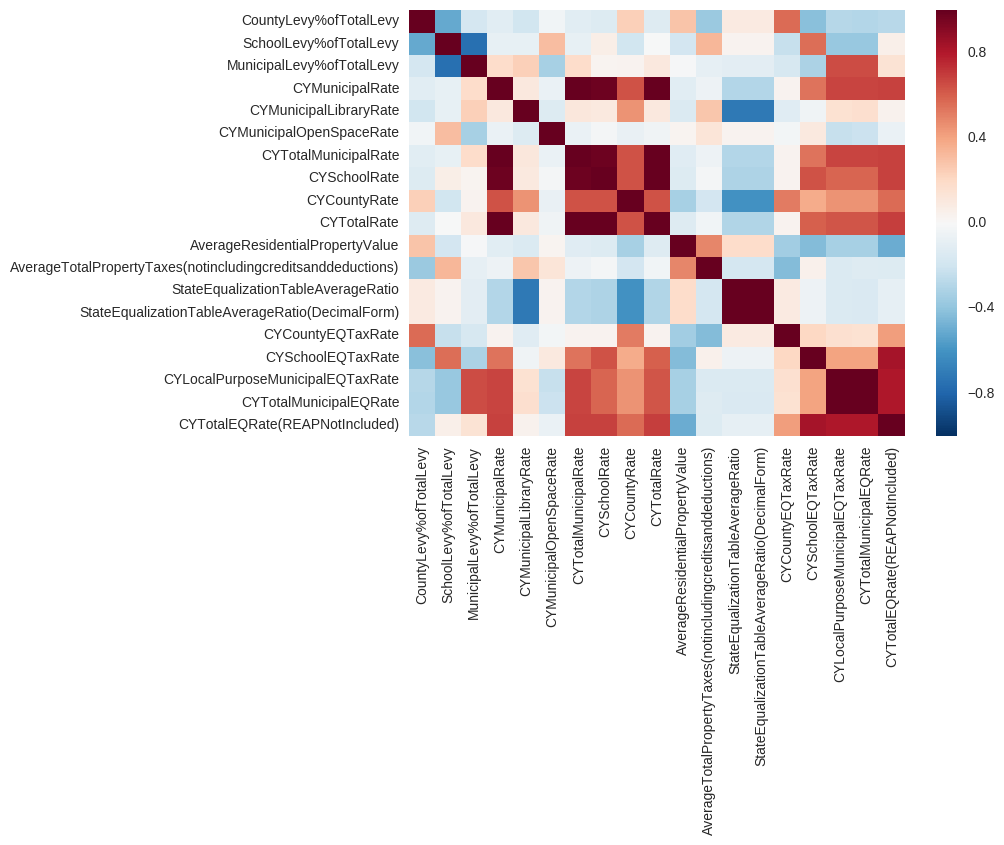

In [16]:
sb.heatmap(t3.iloc[:,1:].corr());